In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from ggplot import *
import seaborn as sns

### Read the dataset

In [5]:
data = pd.read_csv("HR_Attrition.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
Over18                      1470 non-null object
OverTime             

###### Data Description

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [4]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Lab Activity

## Attrition

###### Attrition in numbers (pandas)

In [6]:
%matplotlib notebook

 

* This is one way to tell matplotlib to plot the graphs in the notebook

<IPython.core.display.Javascript object>


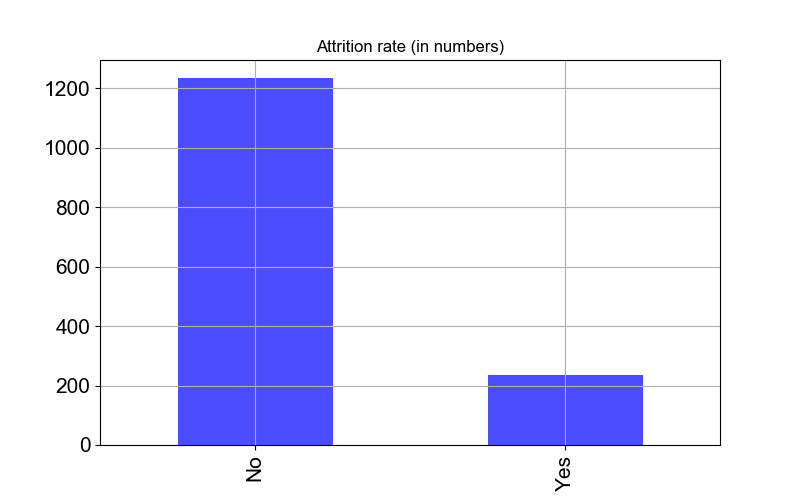

In [7]:
plt.figure()
data.Attrition.value_counts().plot(kind='bar',
                                  figsize=(8,5),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=15)
plt.title('Attrition rate (in numbers)')
plt.grid()
plt.show()

###### Attrition rate in percentage (pandas)

<IPython.core.display.Javascript object>


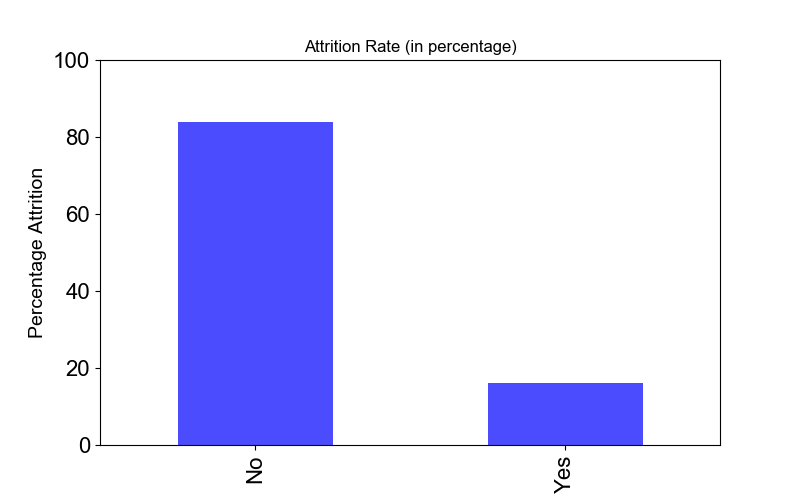

In [8]:
plt.figure()
((data.Attrition.value_counts()/sum(data.Attrition.value_counts()))*100).plot(kind='bar',
                                  figsize=(8,5),
                                  color=["blue"],
                                  alpha = 0.7,
                                  fontsize=16)

plt.ylim([0,100])
plt.title('Attrition Rate (in percentage)')
plt.ylabel('Percentage Attrition',fontsize = 14)

plt.show()

###### Using seaborn

In [9]:
sns.set(font_scale=1)

In [11]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<IPython.core.display.Javascript object>


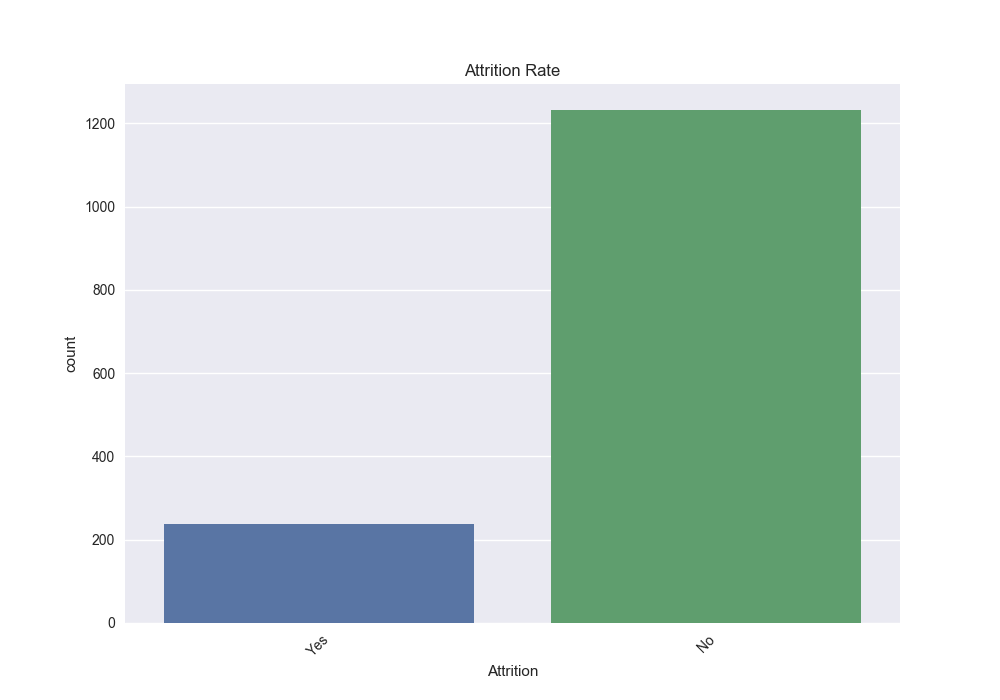

In [12]:
# Setting figure parameters 
plt.figure(figsize = (10,7))
sns.set(style="darkgrid")
# Plot
sns.countplot(x='Attrition', data=data).set_title('Attrition Rate')
# Setting labels
plt.xticks(rotation = 45)
plt.show()

<IPython.core.display.Javascript object>


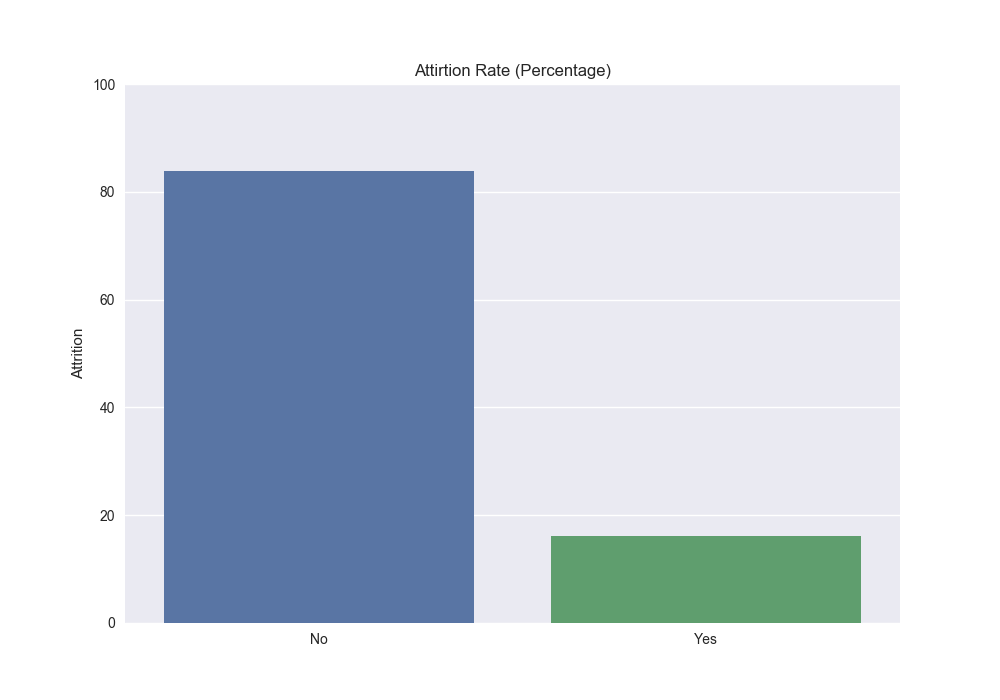

In [13]:
plt.figure(figsize = (10,7))

temp = pd.DataFrame(data.Attrition.value_counts()/sum(data.Attrition.value_counts())*100)
sns.barplot(temp.index,temp.Attrition).set_title('Attirtion Rate (Percentage)')

#Setting y limits
plt.ylim([0,100])
plt.show()

### Gender Distribution in the company

<IPython.core.display.Javascript object>


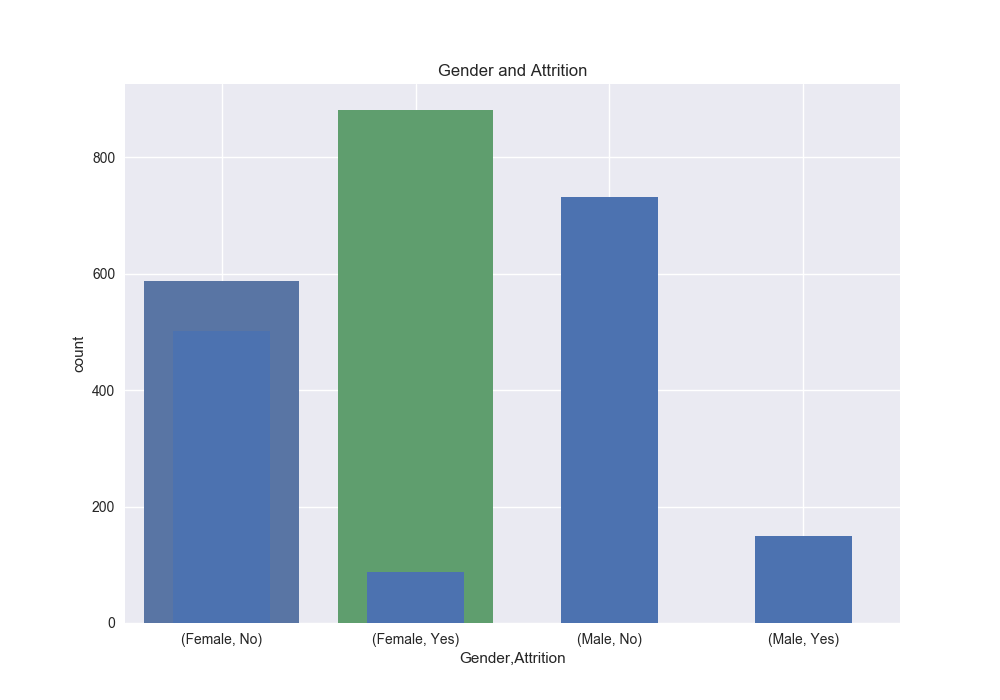

In [14]:
plt.figure(figsize = (10,7))
sns.countplot(x = data.Gender)
plt.show()

### Attrition and Gender

In [15]:
Gender_Attrition = data.groupby(['Gender','Attrition']).size()

In [16]:
Gender_Attrition

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
dtype: int64

In [17]:
Gender_Attrition.unstack()

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [19]:
Gender_Attrition = Gender_Attrition.unstack()

<IPython.core.display.Javascript object>


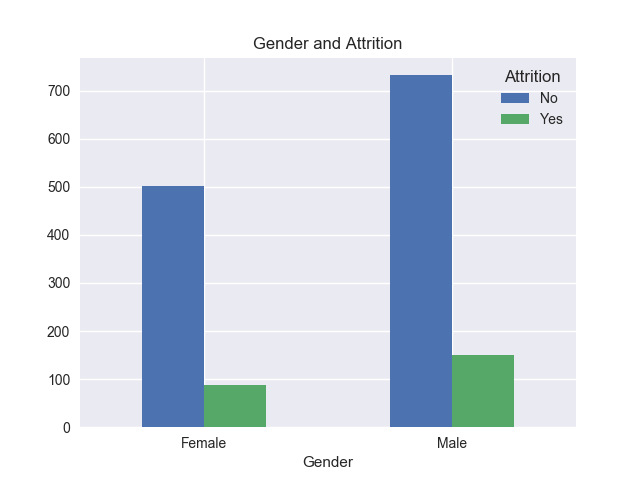

In [20]:
Gender_Attrition.plot(kind = 'bar')
plt.title('Gender and Attrition')
plt.xticks(rotation = 0)
plt.show()


## Gender and Distance from home

<IPython.core.display.Javascript object>


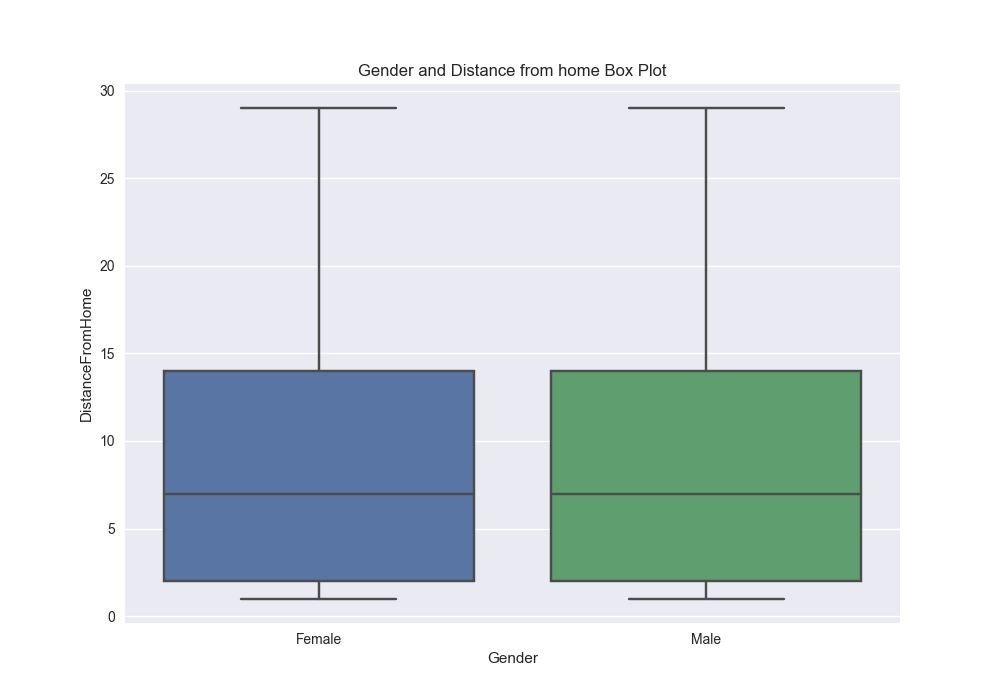

In [21]:
plt.figure(figsize = (10,7))
sns.boxplot(data.Gender,data.DistanceFromHome).set_title('Gender and Distance from home Box Plot')
plt.show()

### Let us bin the distance column

In [22]:
data['Distance_Bins']=(np.digitize(data.DistanceFromHome,[0,5,15,np.max(data.DistanceFromHome)],right=True))

In [23]:
distance_gender = data.groupby(['Distance_Bins','Gender']).size().unstack().reset_index().set_index('Distance_Bins')

## Distance Bins and Gender

<IPython.core.display.Javascript object>


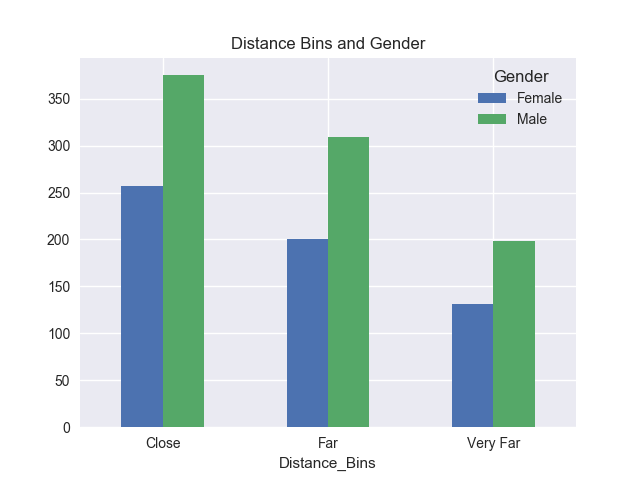

In [24]:
distance_gender.plot(kind= 'bar',title = 'Distance Bins and Gender')
plt.xticks([0,1,2],['Close','Far','Very Far'],rotation = 0)
plt.show()

In [26]:
## Years at company and Age

<IPython.core.display.Javascript object>


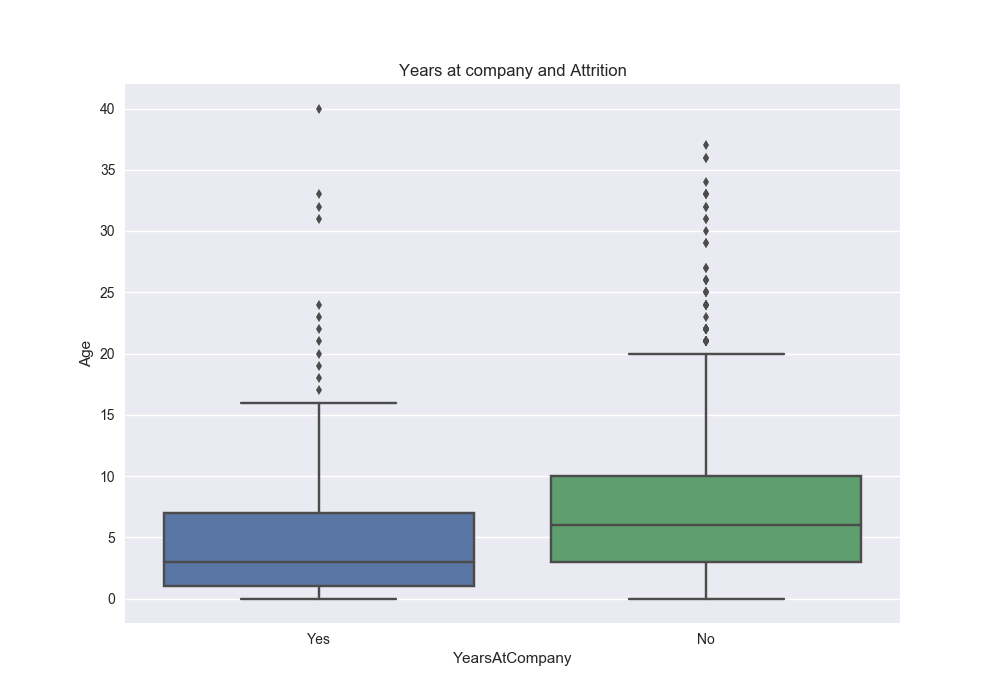

In [25]:
plt.figure(figsize = (10,7))

sns.boxplot(data.Attrition,data.YearsAtCompany)
plt.title('Years at company and Attrition')
plt.xlabel('YearsAtCompany')
plt.ylabel('Age')
plt.show()

## Years at company and Age

<IPython.core.display.Javascript object>


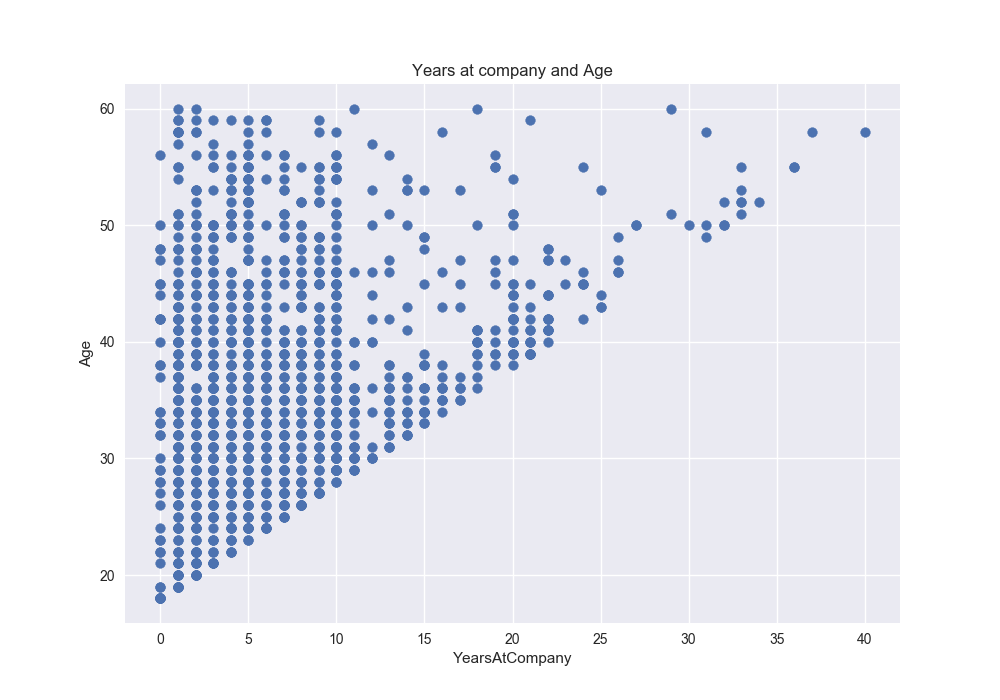

In [27]:
plt.figure(figsize = (10,7))

plt.scatter(x = data.YearsAtCompany,y = data.Age)
plt.title('Years at company and Age')
plt.xlabel('YearsAtCompany')
plt.ylabel('Age')
plt.show()


## Age and Attrition

<IPython.core.display.Javascript object>


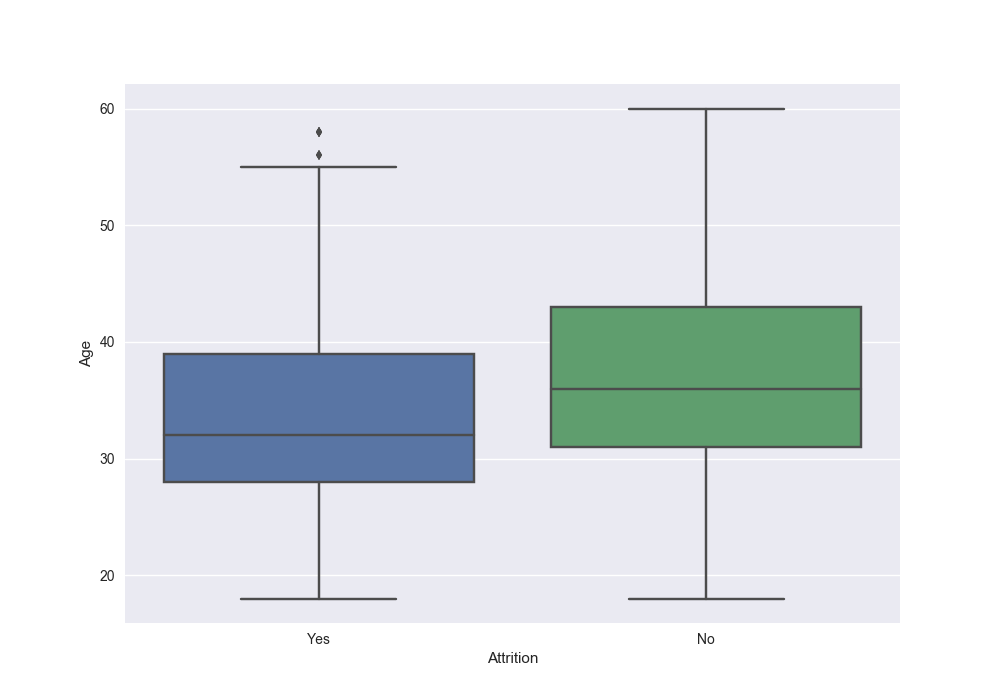

In [28]:
plt.figure(figsize = (10,7))
sns.boxplot(data.Attrition,data.Age)

### Let us bin the age

In [29]:
data['Age_Bins'] = np.digitize(data.Age,[0,25,50],right=True)

In [30]:
distance_gender = data.groupby(['Age_Bins','Gender']).size().unstack().reset_index().set_index('Age_Bins')

<IPython.core.display.Javascript object>


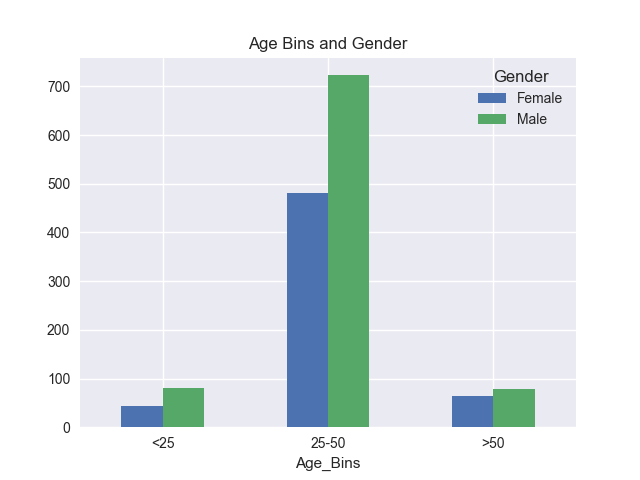

In [31]:
distance_gender.plot(kind= 'bar',title = 'Age Bins and Gender')
plt.xticks([0,1,2],["<25","25-50",">50"],rotation = 0)
plt.show()

### Monthly income vs Attrition

In [32]:
color_seq = []
for i in data.Attrition:
    if i =='Yes':
        color_seq.append('red')
    else:
        color_seq.append('green')

<IPython.core.display.Javascript object>


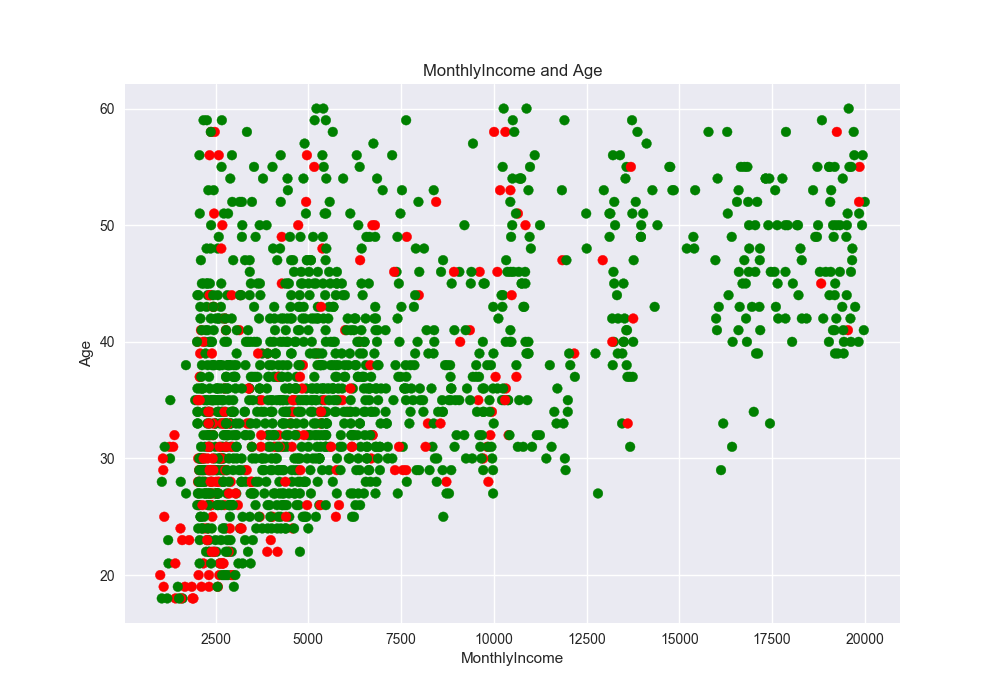

In [33]:
plt.figure(figsize = (10,7))
plt.scatter(x = data.MonthlyIncome,y = data.Age,color = color_seq)
plt.title('MonthlyIncome and Age')
plt.xlabel('MonthlyIncome')
plt.ylabel('Age')
plt.show()

## Years at company and attrition

<IPython.core.display.Javascript object>


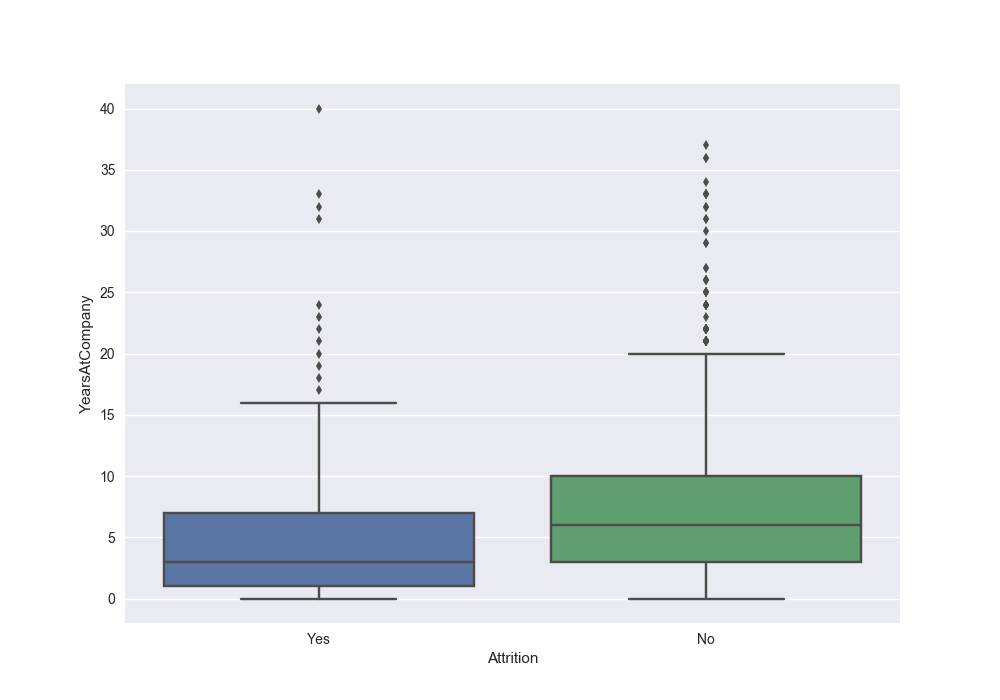

In [34]:
plt.figure(figsize = (10,7))
sns.boxplot(data.Attrition,data.YearsAtCompany)

## JobSatisfaction and Attrition

### Tree map

reference https://python-graph-gallery.com/treemap/


In [35]:
import squarify
jobsat_att = pd.DataFrame(data.groupby(['JobSatisfaction','Attrition']).size().unstack()).reset_index()
# jobsat_att
jobsat_att = pd.melt(jobsat_att,id_vars=['JobSatisfaction'])
jobsat_att

,JobSatisfaction,Attrition,value
0,1,No,223
1,2,No,234
2,3,No,369
3,4,No,407
4,1,Yes,66
5,2,Yes,46
6,3,Yes,73
7,4,Yes,52


<IPython.core.display.Javascript object>


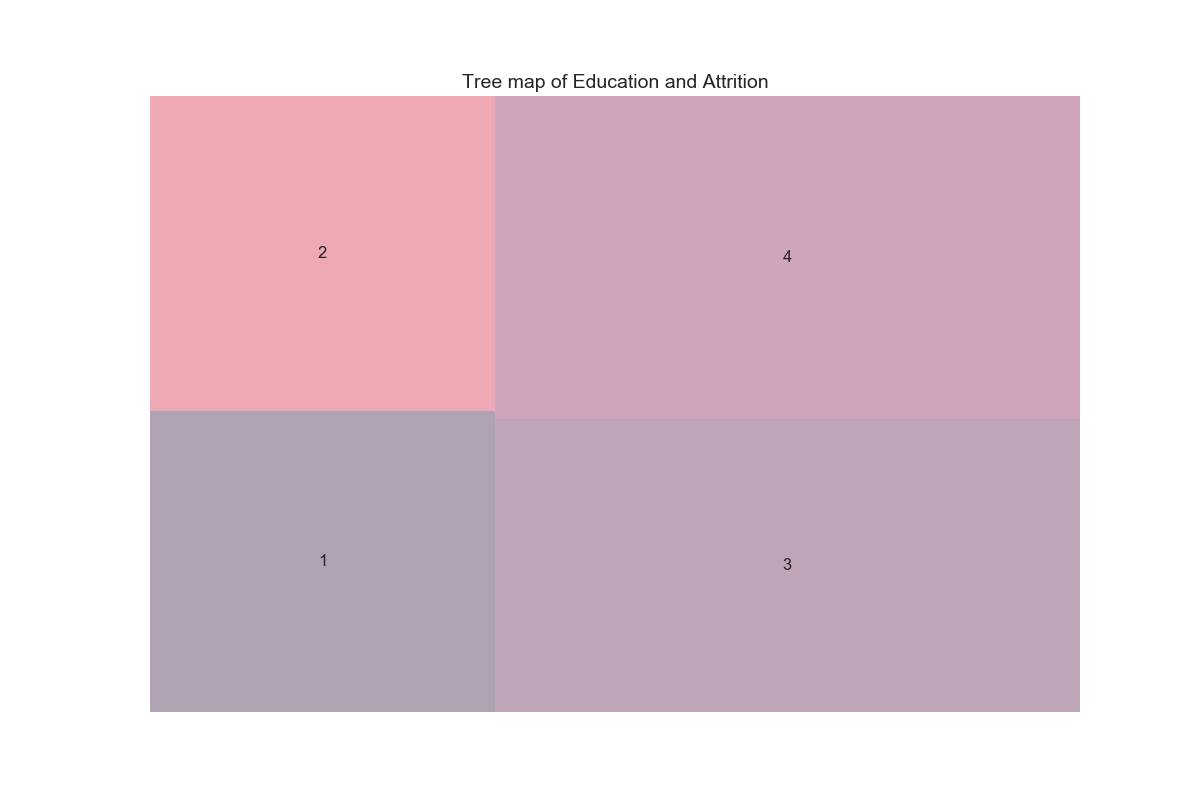

In [37]:
plt.figure(figsize = (12,8))
squarify.plot(sizes=jobsat_att.value[jobsat_att.Attrition=='No'],
              label=jobsat_att.JobSatisfaction[jobsat_att.Attrition=='No'],
              alpha=.4 )
plt.title('Tree map of Education and Attrition',fontsize = 14)
plt.axis('off')
plt.show()

### Number of companies worked, Age ,Attrition

In [38]:
data.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

<IPython.core.display.Javascript object>


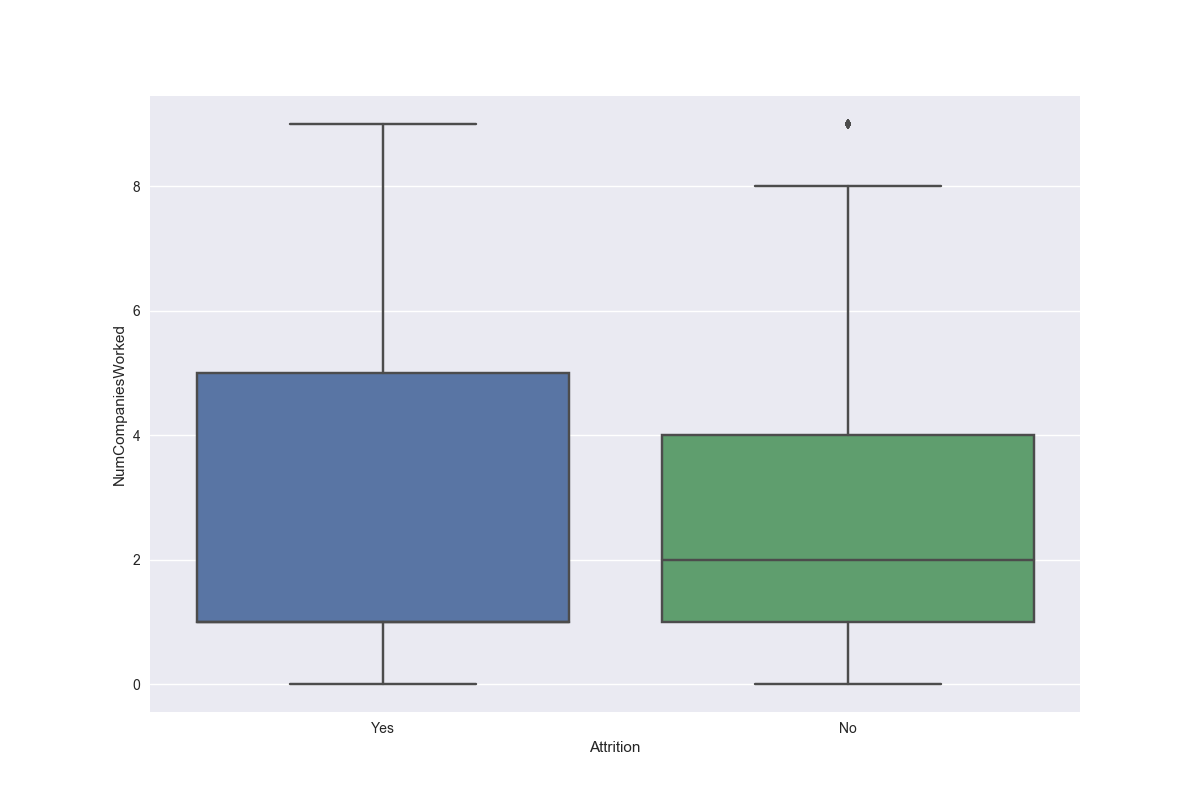

In [39]:
plt.figure(figsize = (12,8))
sns.boxplot(data.Attrition,data.NumCompaniesWorked)

In [40]:
NumCompaniesWorked_a = data.groupby(['NumCompaniesWorked','Attrition']).size().unstack().reset_index().set_index('NumCompaniesWorked')

In [41]:
NumCompaniesWorked_a

Attrition,No,Yes
NumCompaniesWorked,,
0,174,23
1,423,98
2,130,16
3,143,16
4,122,17
5,47,16
6,54,16
7,57,17
8,43,6


<IPython.core.display.Javascript object>


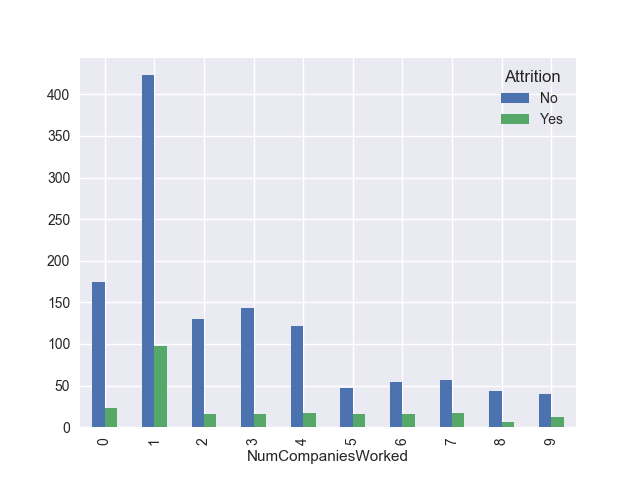

In [42]:
NumCompaniesWorked_a.plot(kind = 'bar')

<IPython.core.display.Javascript object>


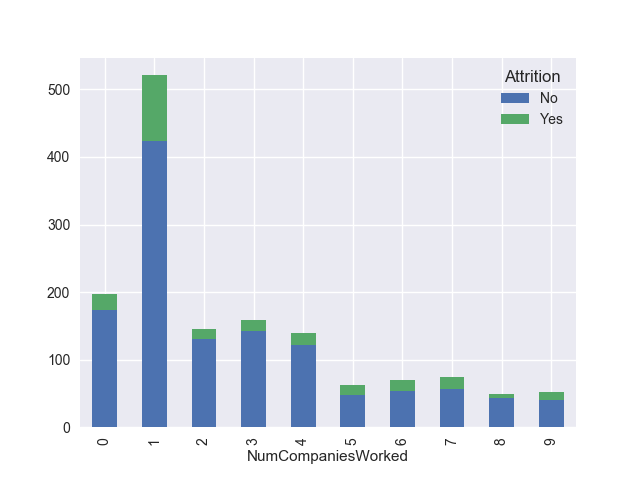

In [43]:
NumCompaniesWorked_a.plot(kind = 'bar',stacked = True)
plt.show()

<IPython.core.display.Javascript object>


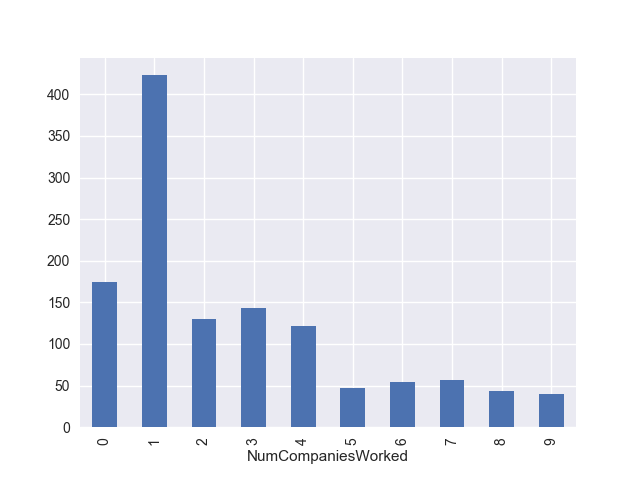

In [44]:
plt.figure()
NumCompaniesWorked_a.iloc[:,0].plot(kind = 'bar')
plt.show()

####  Let us now add age

<IPython.core.display.Javascript object>


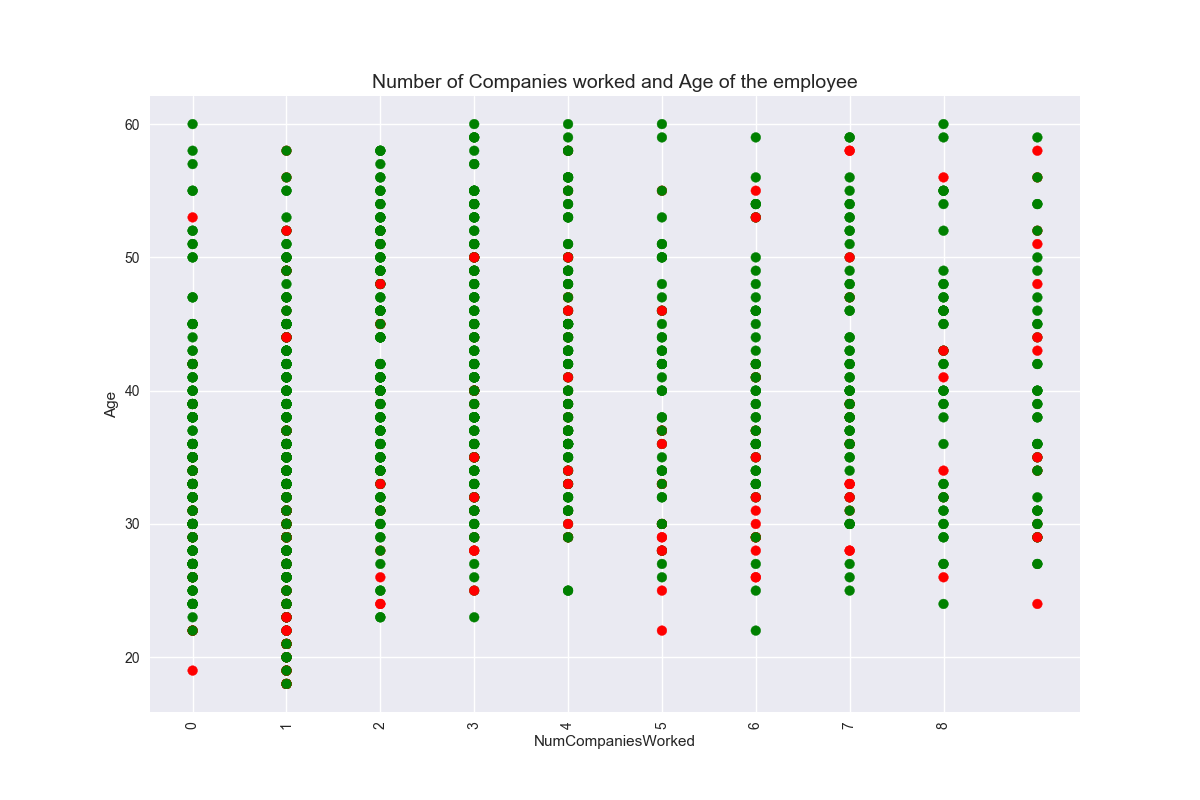

Text(0.5,1,'Number of Companies worked and Age of the employee')

In [45]:
# Accessing the figure and axis elemeents of the plot
fig, ax = plt.subplots(figsize = (12,8))

# Scatter plot
plt.scatter(data.NumCompaniesWorked,data.Age,color = color_seq)

## Setting x axis values
ax.set_xticks(list(range(0,max(data.NumCompaniesWorked),1)))
ax.set_xticklabels(list(range(0,max(data.NumCompaniesWorked),1)),rotation = 90)

# Setting xlable, y label and title for the plot
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Age')
plt.title('Number of Companies worked and Age of the employee',fontsize = 14)

### Generate a new feature  using Age and Number of companies worked

In [46]:
data['Age_NumCompWorked'] = np.round(data.Age / (data.NumCompaniesWorked+1))

In [48]:
data.Age_NumCompWorked.head()

0     5.0
1    24.0
2     5.0
3    16.0
4     3.0
Name: Age_NumCompWorked, dtype: float64

C:\Users\peri_\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


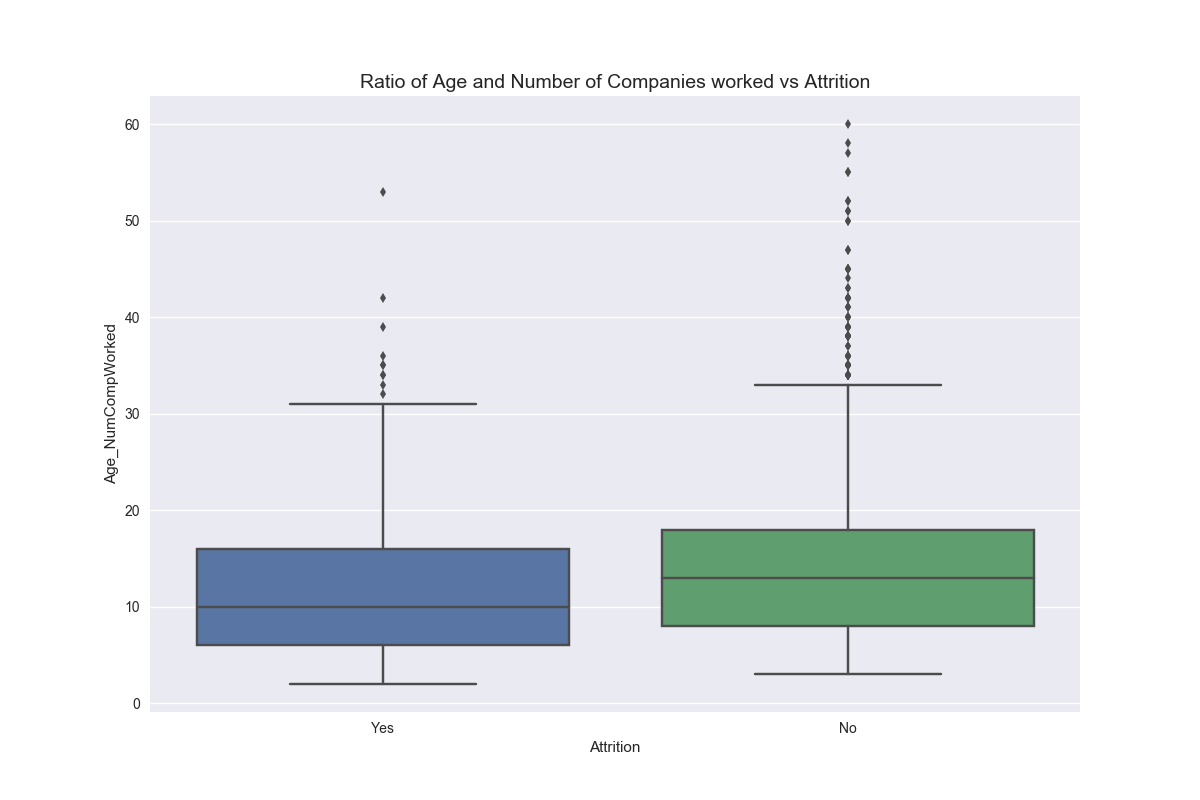

In [49]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data.Attrition,data.Age_NumCompWorked).set_title('Ratio of Age and Number of Companies worked vs Attrition',fontsize = 14)

plt.show()

## Total Working Years , Number of companies and Attrition

In [45]:
# Scatter plot

C:\Users\peri_\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


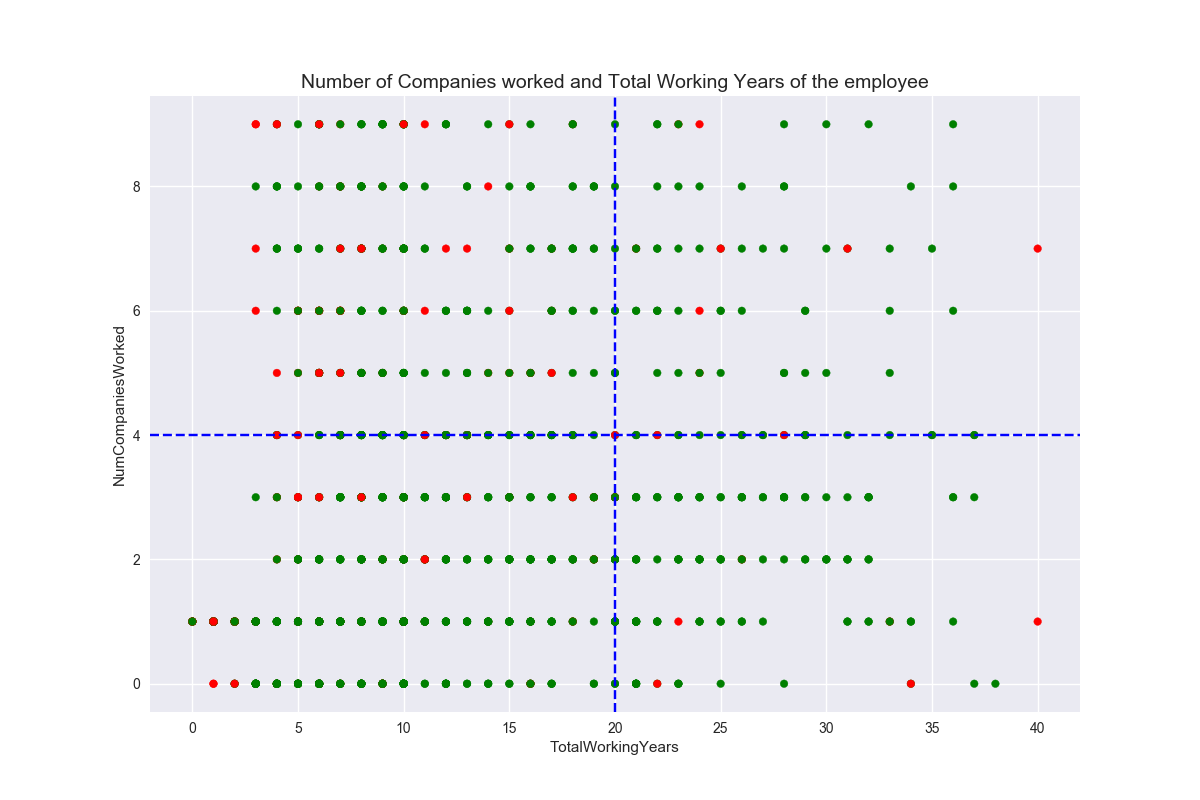

In [50]:
# Accessing the figure and axis elemeents of the plot
fig, ax = plt.subplots(figsize = (12,8))

# Scatter plot
plt.scatter(data.TotalWorkingYears,data.NumCompaniesWorked,color = color_seq,s = 30)

# Setting xlable, y label and title for the plot
plt.ylabel('NumCompaniesWorked')
plt.xlabel('TotalWorkingYears')
plt.title('Number of Companies worked and Total Working Years of the employee',fontsize = 14)

plt.axhline(y=4, color='b', linestyle='--')
plt.axvline(x=20, color='b', linestyle='--')


### Generate a new feature  using TotalWorkingYears and Number of companies worked

In [47]:
data['TotYears_NumComp'] = np.round(data.TotalWorkingYears / (data.NumCompaniesWorked+1))

In [48]:
data.TotYears_NumComp.head()

0    1.0
1    5.0
2    1.0
3    4.0
4    1.0
Name: TotYears_NumComp, dtype: float64

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


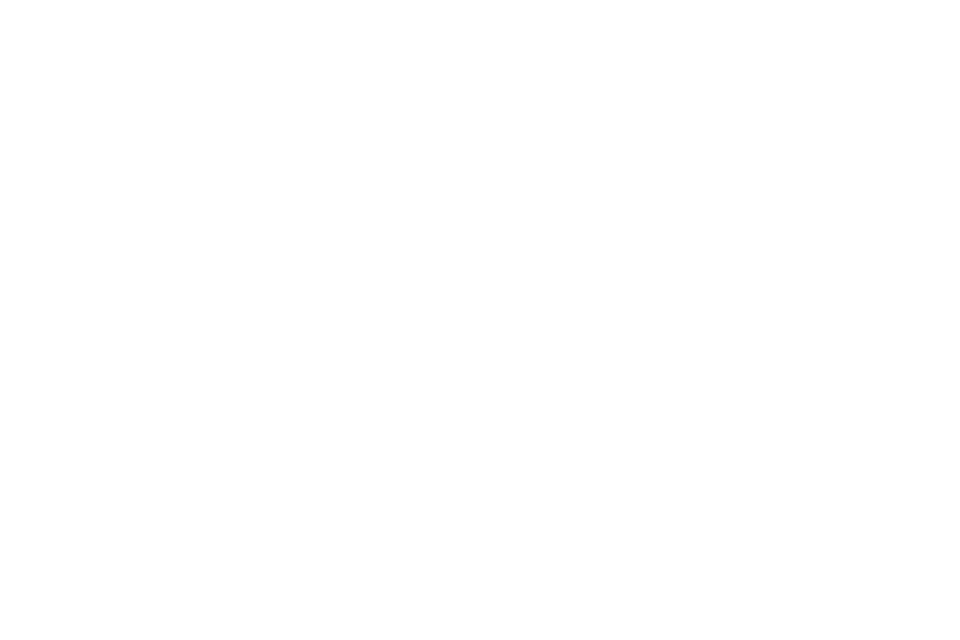

In [49]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data.Attrition,data.TotYears_NumComp).set_title('Ratio of Age and Number of Companies worked vs Attrition',fontsize = 14)

plt.axhline(y = 2,color='b', linestyle='--')
plt.show()

## OverTime and Performance Rating

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


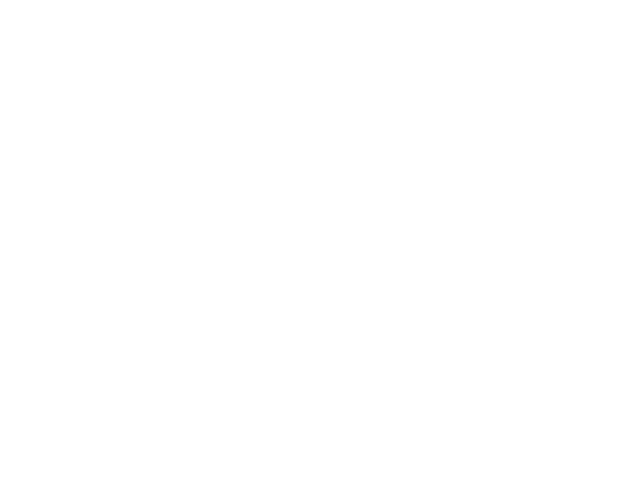

In [50]:
plt.figure()
plt.scatter(data.PerformanceRating,data.PercentSalaryHike)
plt.title("PerformanceRating and PerformanceRating")
plt.show()

In [51]:
perf_hike = data.groupby(['PerformanceRating','PercentSalaryHike','Attrition']).size().unstack()

In [52]:
perf_hike

Attrition                             No  Yes
PerformanceRating PercentSalaryHike          
3                 11                 169   41
                  12                 165   33
                  13                 175   34
                  14                 177   24
                  15                  83   18
                  16                  64   14
                  17                  68   14
                  18                  76   13
                  19                  67    9
4                 20                  48    7
                  21                  43    5
                  22                  44   12
                  23                  22    6
                  24                  15    6
                  25                  17    1

In [53]:
perf_hike.iloc[:,1]

PerformanceRating  PercentSalaryHike
3                  11                   41
                   12                   33
                   13                   34
                   14                   24
                   15                   18
                   16                   14
                   17                   14
                   18                   13
                   19                    9
4                  20                    7
                   21                    5
                   22                   12
                   23                    6
                   24                    6
                   25                    1
Name: Yes, dtype: int64

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


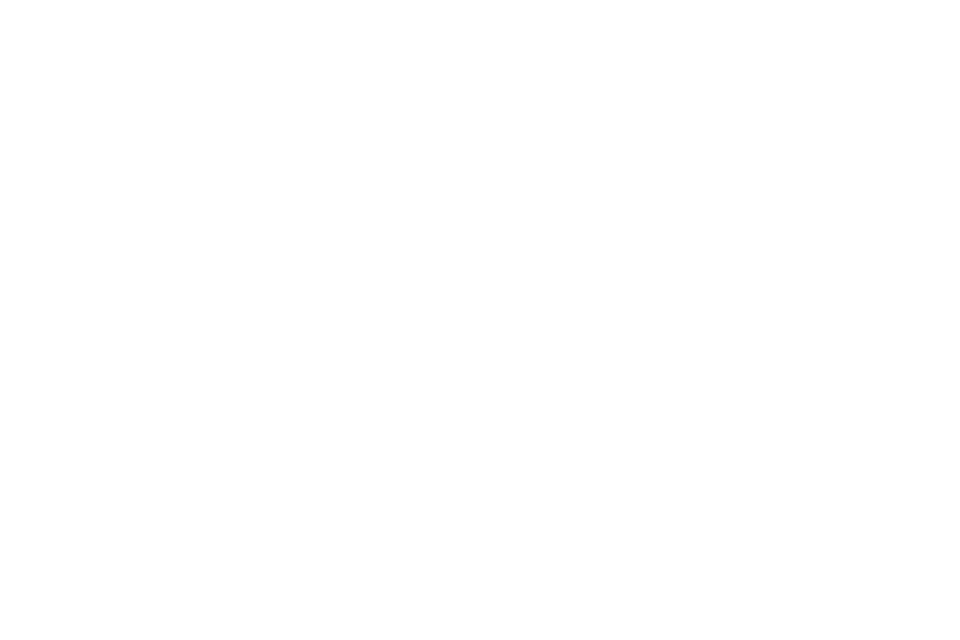

In [54]:
fig, ax = plt.subplots(figsize = (12,8))
perf_hike.iloc[:,1].plot(kind = 'bar',stacked = True,color = 'r')
plt.title('Performace Rating and Attrition',fontsize = 14)
plt.show()

### YearsWithCurrManager, JobSatisfaction

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


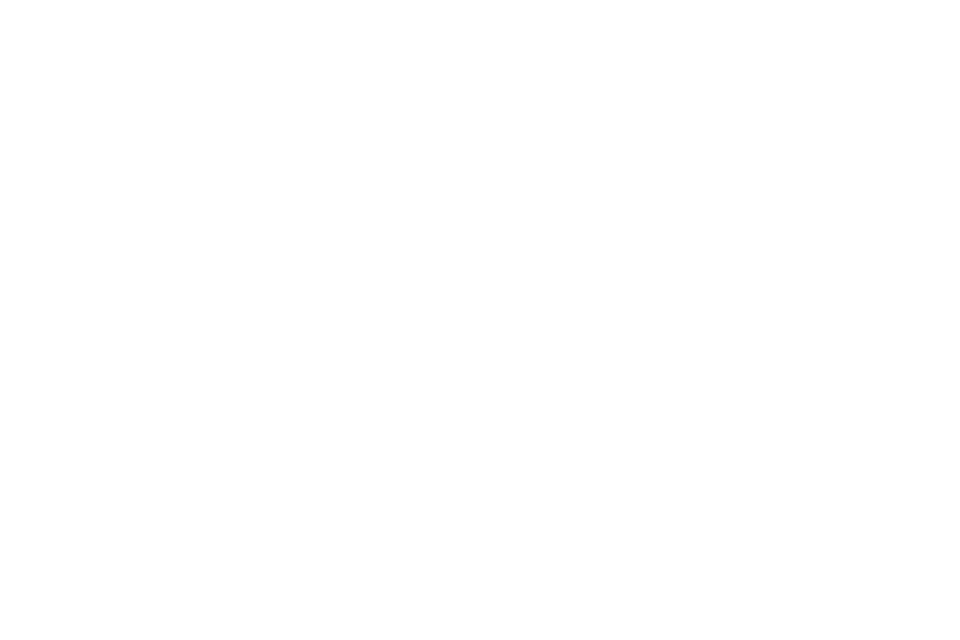

In [55]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data.JobSatisfaction,data.YearsWithCurrManager)
plt.title('Job Satisfaction and Years With Current Manager',fontsize = 14)

plt.show()

### YearsWithCurrManager, JobSatisfaction, Attrition

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


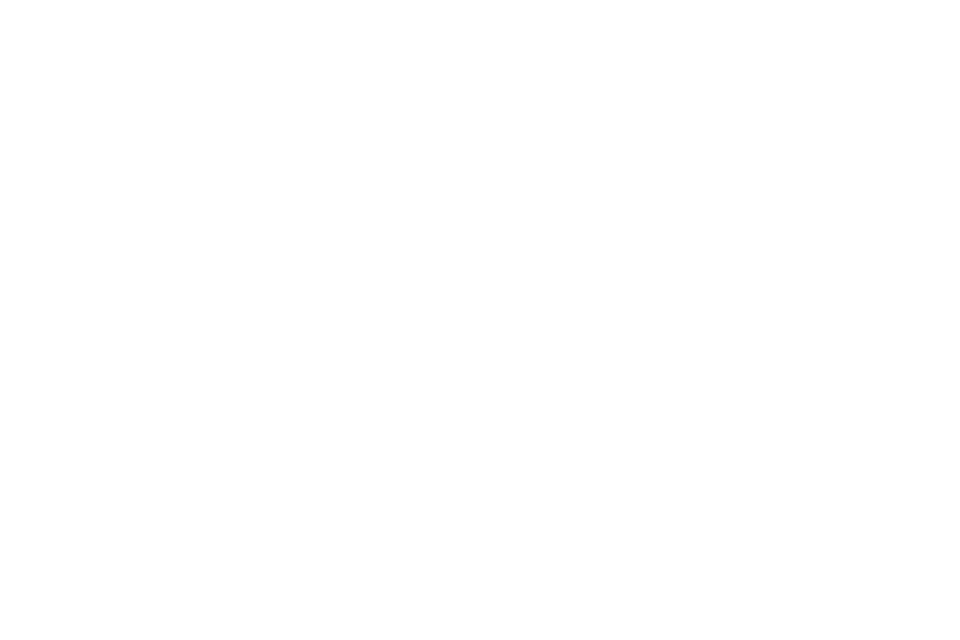

In [56]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data.JobSatisfaction,data.YearsWithCurrManager,data.Attrition)
plt.title('Job Satisfaction and Years With Current Manager and Attrition',fontsize = 14)
plt.axhline(y = 3,color='b', linestyle='--')
plt.show()

More attrition among the employees who spent less than 2 years with the manager

### Marital status and Distance from home

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


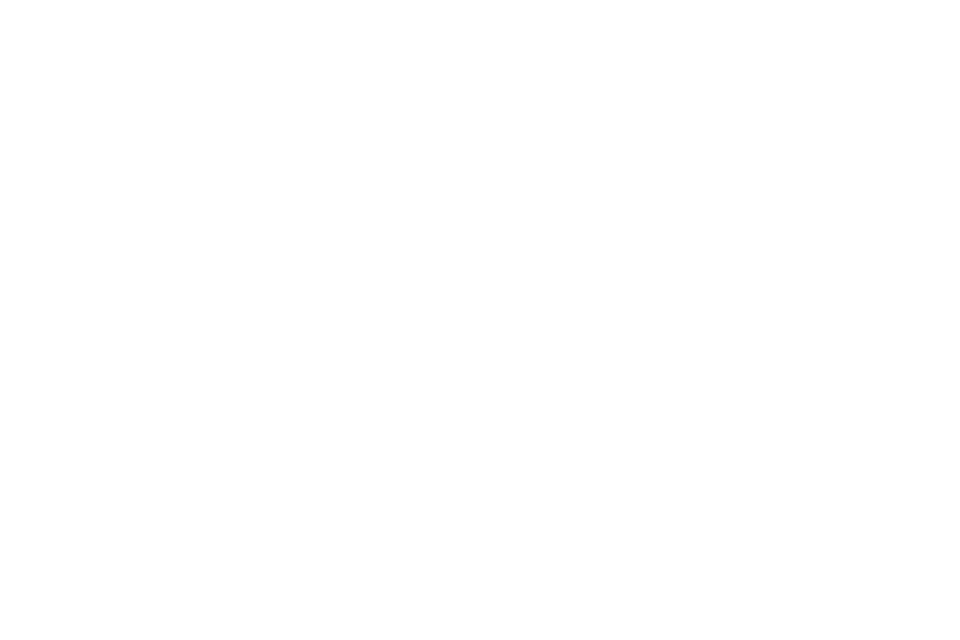

In [57]:
# Accessing figure parameters
fig, ax = plt.subplots(figsize = (12,8))
#Plot
sns.boxplot(data.MaritalStatus,data.DistanceFromHome)
#Plot title
plt.title('Marital Status and Distance From Home',fontsize = 14)
plt.show()

### Marital Status and Distace From Home and Attrition


/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


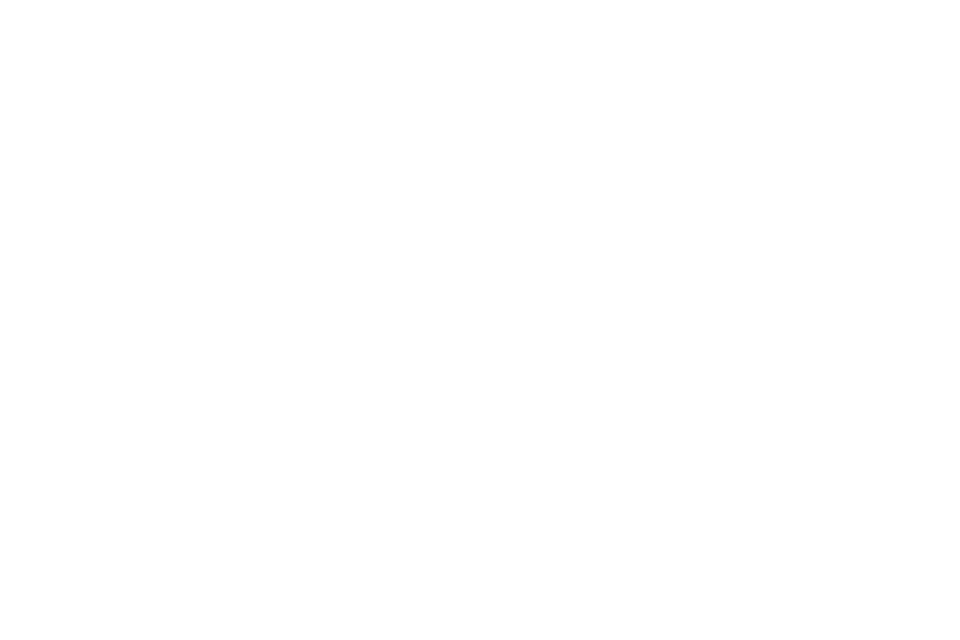

In [58]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data.MaritalStatus,data.DistanceFromHome,data.Attrition)
plt.title('Marital Status, Distance FromHome and Attrition',fontsize = 14)
plt.show()

### Extras

#### Attrition by department

In [59]:
## Attrition per departmen
dept1_attr = pd.DataFrame(data[data.Department=='Human Resources'].Attrition.value_counts()/np.sum(data[data.Department=='Human Resources'].Attrition.value_counts()))*100#.reset_index()
dept2_attr = pd.DataFrame(data[data.Department=='Research & Development'].Attrition.value_counts()/np.sum(data[data.Department=='Research & Development'].Attrition.value_counts()))*100#.reset_index()
dept3_attr = pd.DataFrame(data[data.Department=='Sales'].Attrition.value_counts()/np.sum(data[data.Department=='Sales'].Attrition.value_counts()))*100#.reset_index()

In [60]:
dept1_attr

,Attrition
No,80.952381
Yes,19.047619


/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


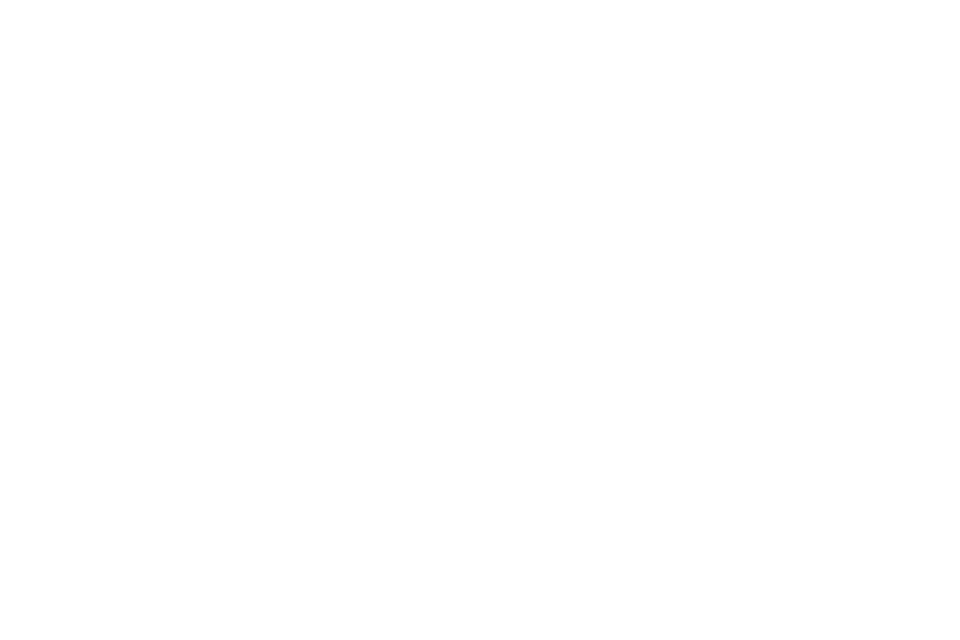

In [61]:
##### Baplot of Attrition per department using inbuilt pandas functionalities
dept1_attr.plot(kind='bar',grid=True,figsize = (12,8))
plt.title('Human Resources')
plt.ylim([0,100])
plt.show()

###### Using seaborn

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


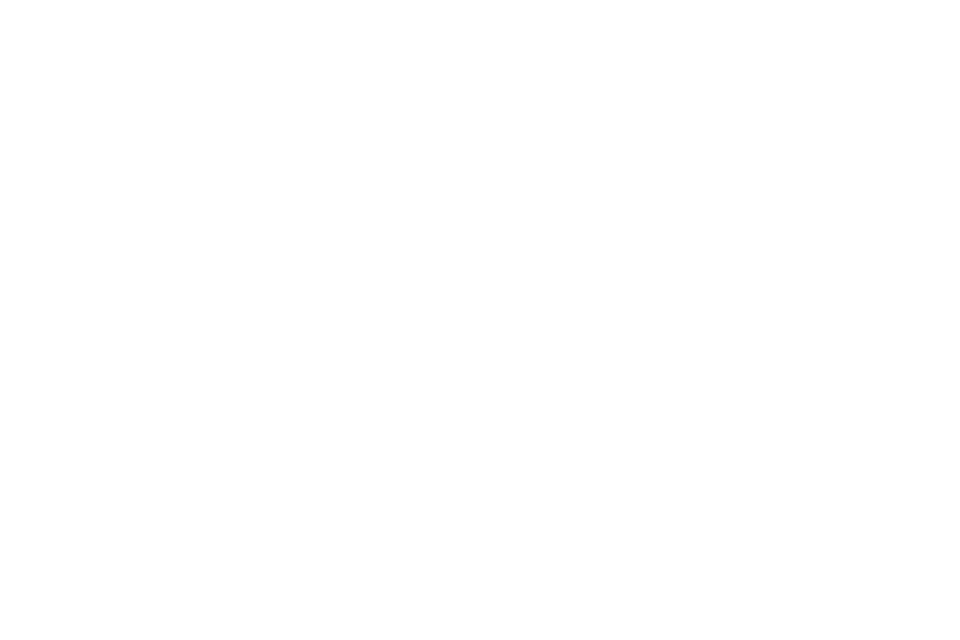

In [62]:
plt.figure(figsize = (12,8))
sns.barplot(dept1_attr.index,dept1_attr.Attrition)
plt.show()

In [63]:
department_wise_attrition = data.groupby(['Department','Attrition']).size().unstack(fill_value=0)
department_wise_attrition

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [64]:
type(department_wise_attrition)

pandas.core.frame.DataFrame

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


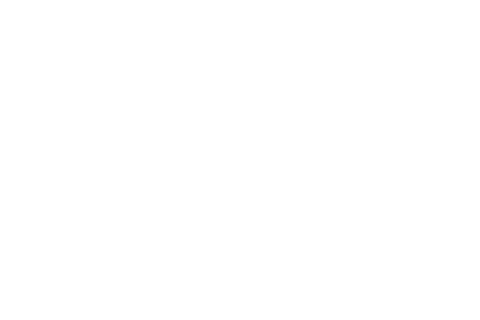

<IPython.core.display.Javascript object>


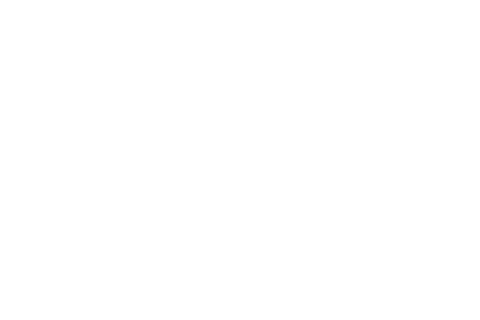

<IPython.core.display.Javascript object>


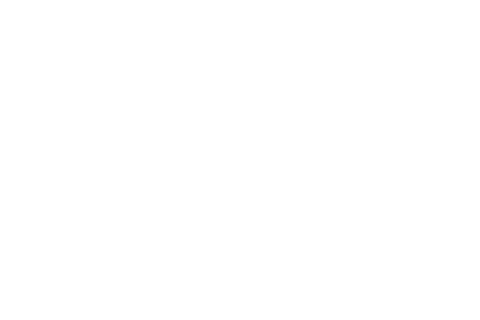

In [65]:

# Let us plot the graphs for all the department
departments = [i for i in department_wise_attrition.index]
for i,j in zip(departments,[dept1_attr,dept2_attr,dept3_attr]):
    plt.figure(figsize = (6,4))
    plt.ylim([0,100])
    sns.barplot(j.index,j.Attrition,alpha = 0.8).set_title(i)
#     plt.title(i)
    plt.show()

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


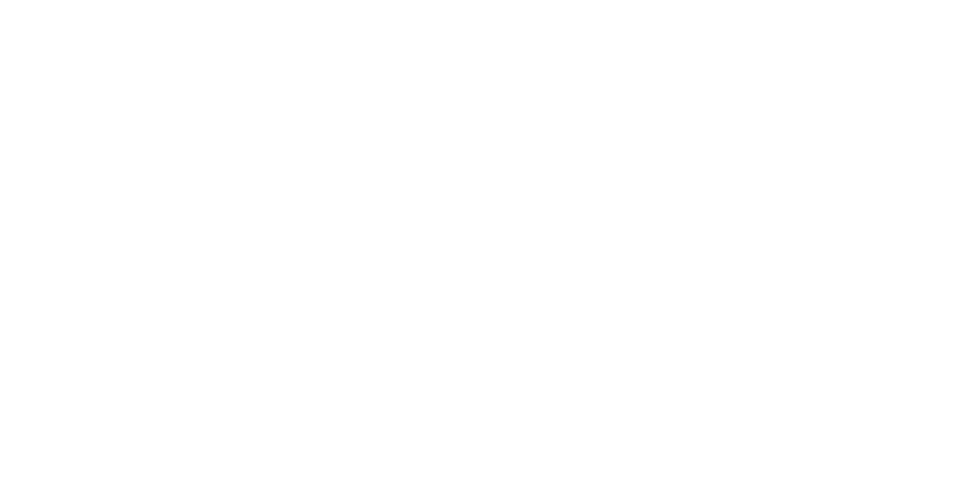

In [66]:
fig,ax = plt.subplots(figsize = (12,6)) # Setting the figure and axis
# Let us plot the graphs for all the department side by side
departments = [i for i in department_wise_attrition.index]
for i,j,n in zip(departments,[dept1_attr,dept2_attr,dept3_attr],[1,2,3]):
    plt.subplot(1,3,n)
    plt.ylim([0,100])
    sns.barplot(j.index,j.Attrition).set_title(i)
#     plt.title(i)
plt.show()

### Plotting the attrition rate for each of the deparments side by side using matplotlib

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


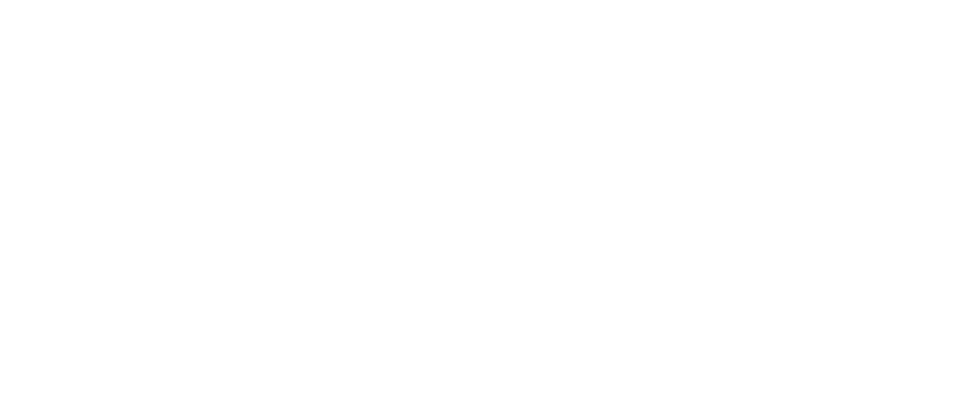

In [67]:
pos = list(range(len(dept1_attr.Attrition)))
width = 0.5

fig,ax = plt.subplots(figsize = (12,5)) # Accessing the figure and the axes elements

# Access the axes elements of the plot
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
# Set title for the plot
ax1.title.set_text(department_wise_attrition.index[0])
ax2.title.set_text(department_wise_attrition.index[1])
ax3.title.set_text(department_wise_attrition.index[2])

# Set the position of the x ticks
ax1.set_xticks([p for p in pos])
ax2.set_xticks([p for p in pos])
ax3.set_xticks([p for p in pos])

# Set the labels for the x ticks
ax1.set_xticklabels(dept1_attr.index)
ax2.set_xticklabels(dept2_attr.index)
ax3.set_xticklabels(dept3_attr.index)

## Plot the first plot
plt.subplot(1,3,1) # Access the first plot of the grid
# plot a bar plot
plt.bar([p -width/2 for p in pos], # setting the x axis points
        #using  dept1_attr.Attrition data,
        dept1_attr.Attrition,
        # of width
        width, 
        # with alpha 0.5 which is related to transparency
        alpha=0.5, 
        # with color
        color=['red','blue'],
        # with label the second value in index
        label=['No','Yes']) 
# Setting x and y limits
plt.xlim(min(pos)-width, max(pos)+width)
plt.ylim([0,100])
# plt.grid()


## Plot the second plot

plt.subplot(1,3,2)
# plot a bar plot

plt.bar([p -width/2 for p in pos], 
        #using department_wise_attrition.Yes data,
        dept2_attr.Attrition,
        # of width
        width, 
        # with alpha 0.5 which is related to transparency
        alpha=0.5, 
        # with color
        color=['red','blue'],
        # with label the second value in index
        label=['No','Yes']) 
# Setting x and y limits
plt.xlim(min(pos)-width, max(pos)+width)
plt.ylim([0,100])
# plt.grid()

## Plot the second plot

plt.subplot(1,3,3)
# plot a bar plot

plt.bar([p -width/2 for p in pos], 
        #using department_wise_attrition.Yes data,
        dept3_attr.Attrition,
        # of width
        width, 
        # with alpha 0.5 which is related to transparency
        alpha=0.5, 
        # with color
        color=['red','blue'],
        # with label the second value in index
        label=['No','Yes']) 
# Setting x and y limits
plt.xlim(min(pos)-width, max(pos)+width)
plt.ylim([0,100])
# plt.grid()

plt.tight_layout()
plt.show()

### Plotting Department wise attrition in one plot (using inbuilt functions)

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


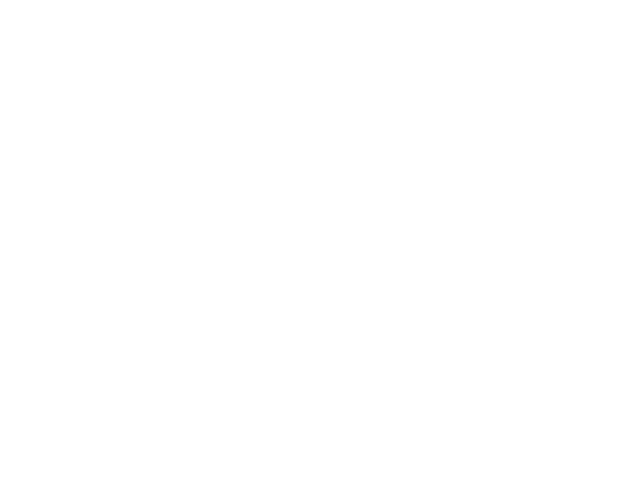

In [68]:
department_wise_attrition.plot(kind='bar')
plt.xticks(rotation = 30)
plt.show()

###### Histogram

### Age

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


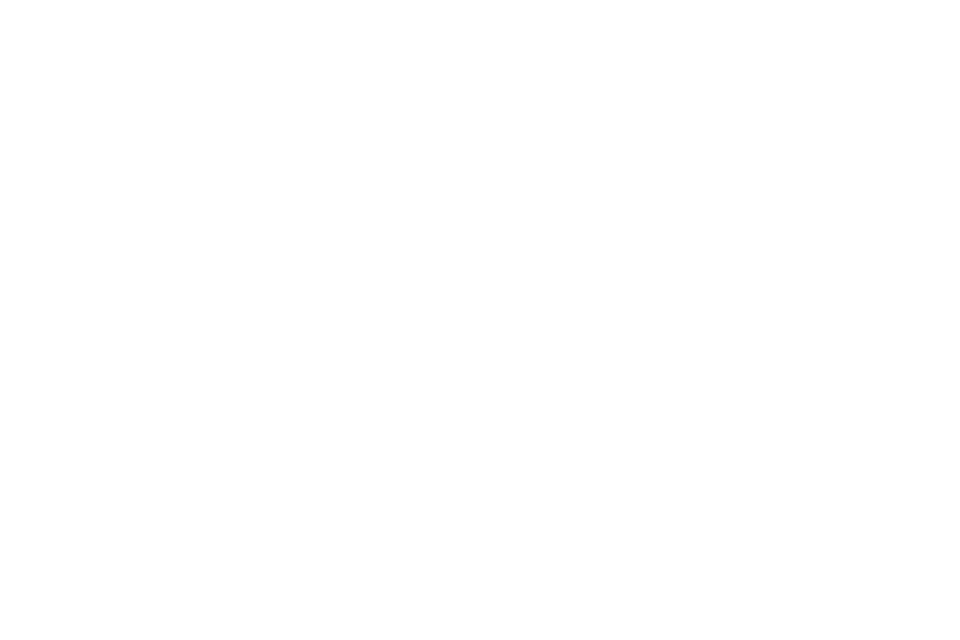

In [69]:
plt.figure(figsize = (12,8))
b = sns.distplot(data.Age)
b.set_title('Histogram of Age',fontsize = 16)
b.set_xlabel("Age",fontsize=14)
plt.show()

### FacetGrid for Age

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


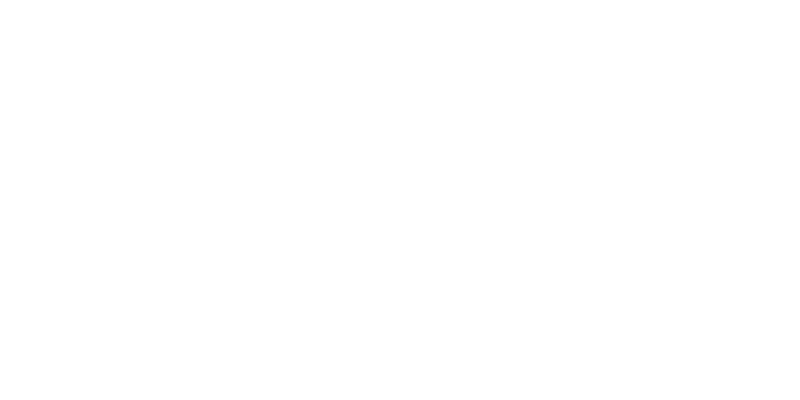

In [70]:
g = sns.FacetGrid(data,col='Attrition',size = 5)
g.map(sns.distplot,'Age')
plt.show()

Activity : Plot the distribution of MonthlyIncome

### Job Level

In [71]:
# sns.boxplot?

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


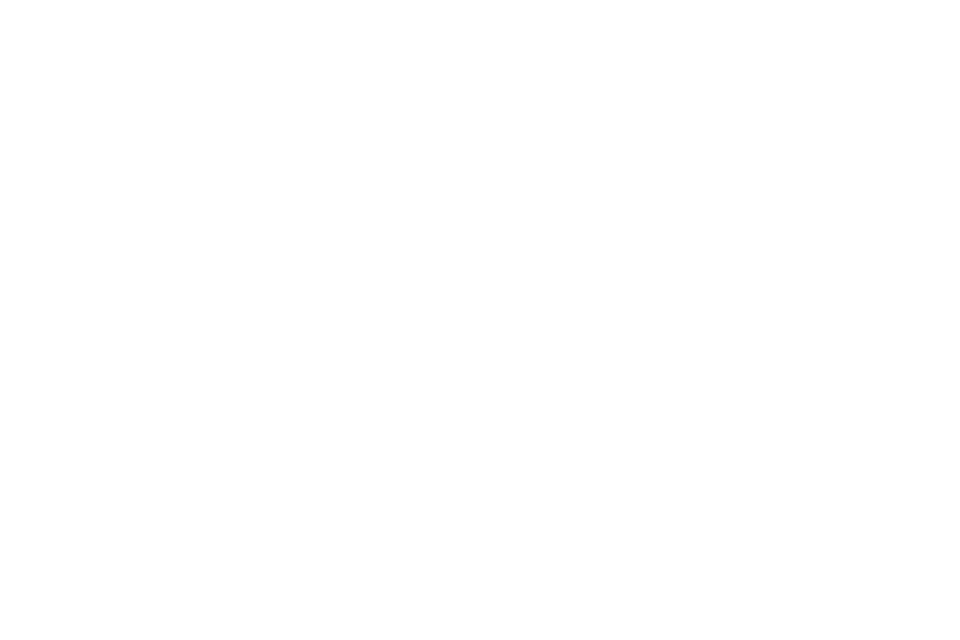

In [72]:
fig,ax = plt.subplots(figsize = (12,8))
g = sns.boxplot(x="JobLevel",y= 'Age', hue="Attrition", data=data)

plt.title('Job Level and Attrition rate',fontsize = 16)
plt.ylim ([0,70])

plt.ylabel("Age",fontsize=12)
plt.xticks([0,1,2,3,4],['Low','Medium','High','Very High','Executive'])
plt.xlabel("JobLevel",fontsize=12)
plt.show()

In [73]:
worklife_attr = data.groupby(['WorkLifeBalance','Attrition']).size().unstack()#.reset_index()

In [74]:
worklife_attr

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


### Stacked bar chart 

###### Employee Attrition by Work Life Balance.

/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


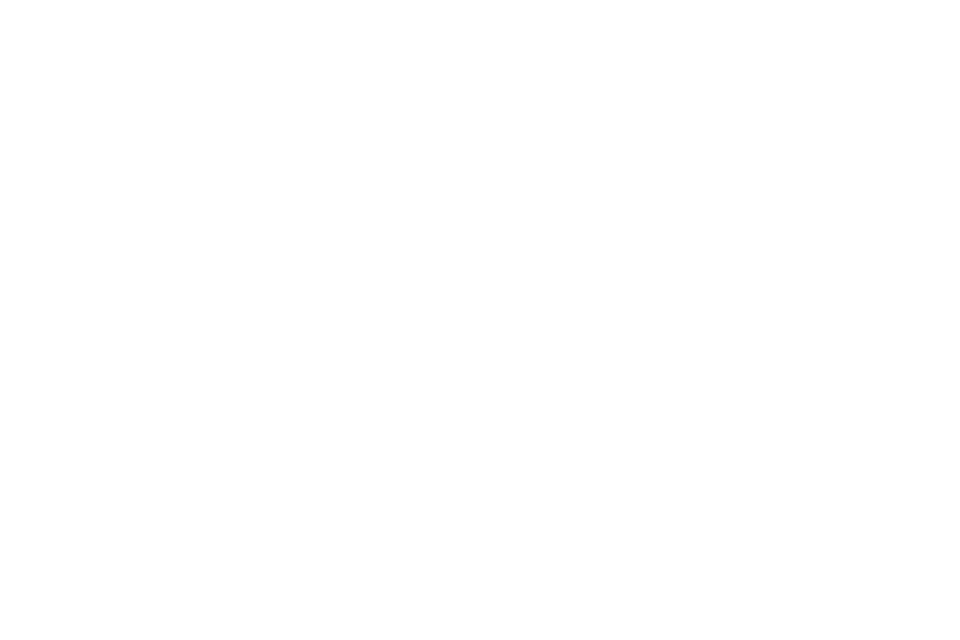

In [75]:
ct = pd.crosstab(data.WorkLifeBalance, data.Attrition)
ct.plot.bar(stacked=True,figsize = (12,8))

plt.title('WorkLifeBalance and Attrition',fontsize = 14)
plt.xlabel('WorkLife Balance',fontsize = 12)
plt.ylabel('Number of people',fontsize = 12)

plt.legend(title='Attrition')
plt.ylim(0,max(sum(ct.values)))
plt.show()

Draw grouped bar chart

# 6. Scatter plot

###### Employee Attrition by years at company and years since last promotion.


/home/chaithanya/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


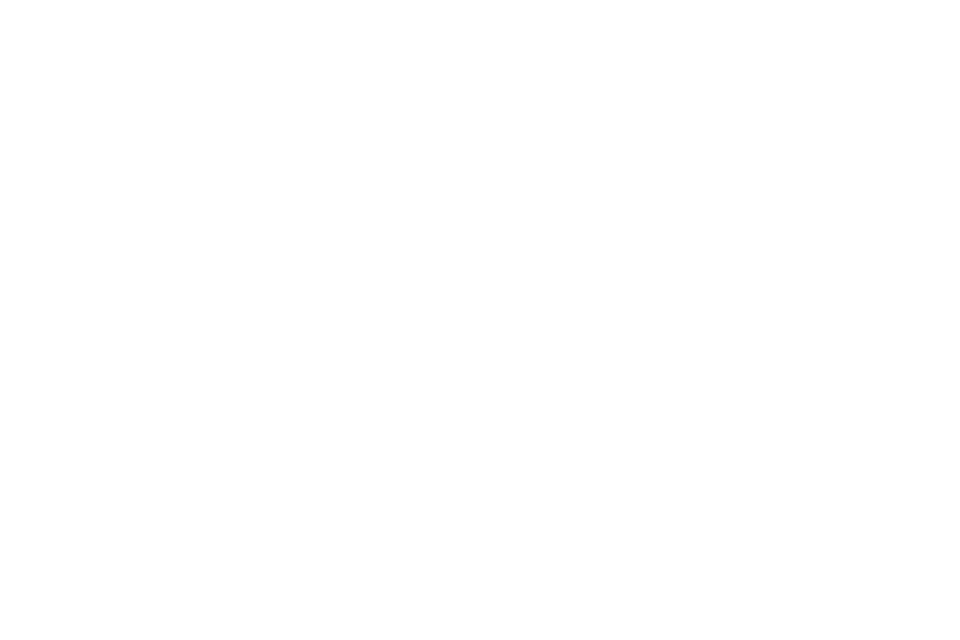

In [76]:
fig, ax = plt.subplots(figsize = (12,8))
sns.regplot(x = data.YearsAtCompany,y = data.YearsSinceLastPromotion,fit_reg= False)
plt.title("Scatter plot of Number of years at company and Years since last promotion",fontsize = 14)
plt.xlabel('YearsAtCompany',fontsize = 12)
plt.xlabel('YearsSinceLastPromotion',fontsize = 12)
plt.show()

### JobSatisfaction, YearsAtCompany, YearsSinceLastPromotion

In [77]:
js_e = pd.DataFrame(data.groupby(['YearsAtCompany','YearsSinceLastPromotion','JobSatisfaction','Attrition']).size()).reset_index()

In [78]:
js_e.head()

,YearsAtCompany,YearsSinceLastPromotion,JobSatisfaction,Attrition,0
0,0,0,1,No,6
1,0,0,1,Yes,6
2,0,0,2,No,3
3,0,0,2,Yes,2
4,0,0,3,No,10


In [79]:
color_seq = []
for i in js_e.iloc[:,3]:
    if i =='Yes':
        color_seq.append('green')
    else :
        color_seq.append('blue')

In [80]:
color_seq[0:10]

['blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green']

In [81]:
%matplotlib notebook

<IPython.core.display.Javascript object>


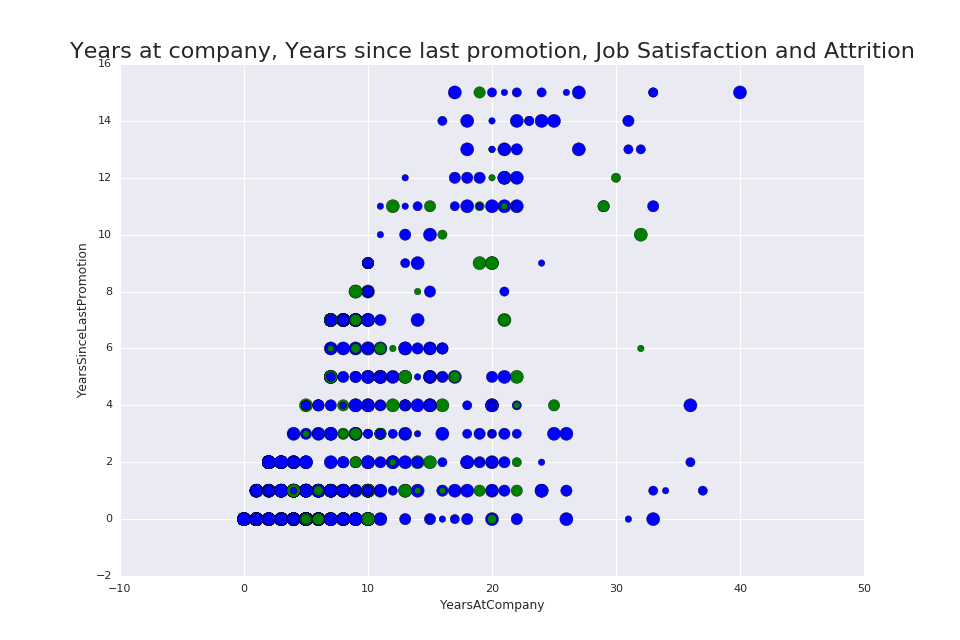

In [82]:
fig,ax  = plt.subplots(figsize=(12,8))

ax.scatter(data.YearsAtCompany,data.YearsSinceLastPromotion,s=js_e.iloc[:,2]*35,c = color_seq)

plt.title("Years at company, Years since last promotion, Job Satisfaction and Attrition",size = 20)# plt.yticks([0,1,2,3,4,5]) 

plt.xlabel('YearsAtCompany')
plt.ylabel('YearsSinceLastPromotion')

plt.show()

### Education, YearsAtCompany, YearsSinceLastPromotion

<IPython.core.display.Javascript object>


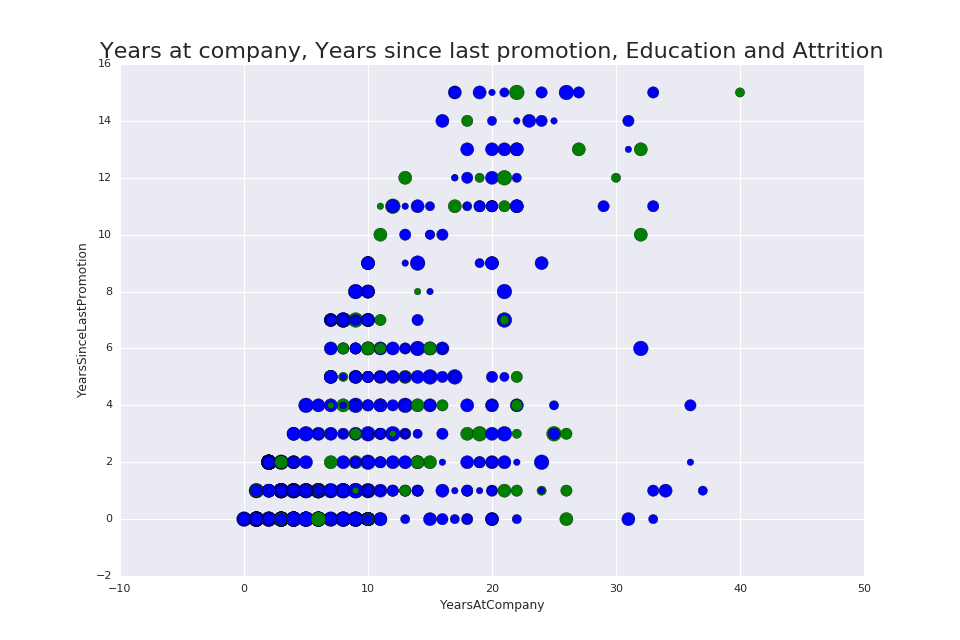

In [83]:
Yc_Yp_e = pd.DataFrame(data.groupby(['YearsAtCompany','YearsSinceLastPromotion','Education','Attrition']).size()).reset_index()
color_seq = []
for i in Yc_Yp_e.iloc[:,3]:
    if i =='Yes':
        color_seq.append('green')
    else :
        color_seq.append('blue')

fig,ax  = plt.subplots(figsize=(12,8))

ax.scatter(data.YearsAtCompany,data.YearsSinceLastPromotion,s=Yc_Yp_e.iloc[:,2]*35,c = color_seq)

plt.title("Years at company, Years since last promotion, Education and Attrition",size = 20)# plt.yticks([0,1,2,3,4,5]) 

plt.xlabel('YearsAtCompany')
plt.ylabel('YearsSinceLastPromotion')

plt.show()

### 3D scatter plot

<IPython.core.display.Javascript object>


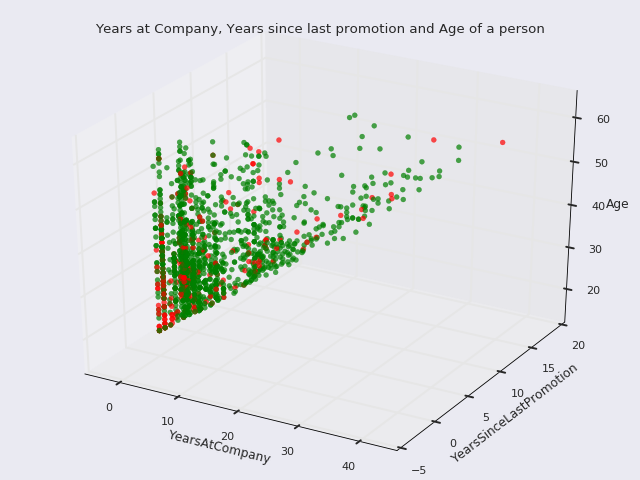

In [84]:
# I,port the 3D chart from matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Generating a sequence for the colors, based on attrition, Red for attrition, Green for no attrition
col_seq = []
for i in data.Attrition:
    if i =='Yes':
        col_seq.append('r')
    else:
        col_seq.append('g')


# sns.set_style('darkgrid')
# Accessing/ Setting the firgure elements
fig = plt.figure()
ax = Axes3D(fig)

n = 1500
# Extracting th x, y ,z  values 
sequence_containing_x_vals = data.YearsAtCompany[0:n]
sequence_containing_y_vals = data.YearsSinceLastPromotion[0:n]
sequence_containing_z_vals = data.Age[0:n]

# Plot
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,color=col_seq[0:n],
          alpha = 0.7)


## Setting x, y, z labels, Figure title
ax.set_xlabel("YearsAtCompany")
ax.set_ylabel("YearsSinceLastPromotion")
ax.set_zlabel("Age")
plt.title("Years at Company, Years since last promotion and Age of a person")
# Setting x,y,z limits
ax.set_xlim(min(data.YearsAtCompany[0:n])-5,max(data.YearsAtCompany[0:n])+5)
ax.set_ylim(min(data.YearsSinceLastPromotion[0:n])-5,max(data.YearsSinceLastPromotion[0:n])+5)
ax.set_zlim(min(data.Age[0:n])-5,max(data.Age[0:n])+5)


plt.show()